In [178]:
#Segment Comet Input File into weeks
import datetime

mut_dict={}
dates=[]
erCount=0
with open("/Users/prochetasen/UpdatedCometInput.txt","r") as f:
    for line in f:
        st=line.split("\t")
        if len(st)==3:
            continue
        firstColumn=st[0]
        year=firstColumn.split("#")[0].split("/")
        year=year[len(year)-1].split("_")[0]
        if len(year) == 3:
            year=firstColumn.split("#")[0].split("/")
            year=year[len(year)-2].split("_")[0]
        date=firstColumn.split("#")[1]
        if date.startswith(year) == False:
            print(year, ": ",date,": ",line)
            erCount=erCount+1
            continue;
        try:
            dates.append(datetime.datetime.strptime(date, "%Y-%m-%d").date())
            if date in mut_dict.keys():
                x=mut_dict[date]
                x.append(line)
                mut_dict[date]=x
            else:
                x=[]
                x.append(line)
                mut_dict[date]=x
        except:
            c=0
print("Number of errors ",erCount)
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%Y-%m-%d") for ts in dates]
for i in range(1,3):
    print(sorteddates[i])
print("Number of dates", len(sorteddates))
print(len(mut_dict.keys()))


finalDate=datetime.datetime.strptime(sorteddates[len(sorteddates)-1], "%Y-%m-%d").date()
startDate=datetime.datetime.strptime(sorteddates[0], "%Y-%m-%d").date()
weeks=[]
while startDate <= finalDate:
    x=[]
    x.append(startDate)
    endDate = startDate + datetime.timedelta(days=7)
    x.append(endDate)
    weeks.append(x)
    startDate=endDate
    
print("Number of weeks: ",len(weeks))
index=0
x=weeks[index]
date_dict={}
with open("/Users/prochetasen/Updatedweeklyreport.txt","w") as f:
    for date in sorteddates:
        if date in date_dict.keys():
            continue;
        else:
            date_dict[date]=0
        date=datetime.datetime.strptime(date, "%Y-%m-%d").date()
        if x[0] <= date and date <= x[1]:
            l=mut_dict[date.strftime("%Y-%m-%d")] 
            print(date,": ",len(l))
            for l1 in l:
                f.write(l1)
        else:
            index = index+1
            x=weeks[index]
            f.write("#\n")
            l=mut_dict[date.strftime("%Y-%m-%d")]
            print(date,": ",len(l))
            for l1 in l:
                f.write(l1)
f.close()

20210504 :  2021-05-04 :  France/PAC-LBM-ALPHABIO/20210504_B.1.617.1#2021-05-04	GT:209.0	CT:240.0	CT:3036.0	CT:3456.0	CT:4964.0	CT:9429.0	GT:11041.0	AG:11200.0	CT:14407.0	GT:16851.0	GT:17522.0	CT:18743.0	CA:19501.0	CT:19812.0	AG:20395.0	TG:20400.0	CT:21845.0	TC:21894.0	GA:21986.0	GA:22021.0	TG:22916.0	GC:23011.0	AG:23402.0	CG:23603.0	TG:24474.0	AT:24774.0	CT:25468.0	CT:26680.0	TG:26766.0	TC:27637.0	GT:28880.0	GT:29401.0	GT:29741.0	

2021 :  2020-04-14 :  USA/MI-MDHHS-SC26251/2021_B.1#2020-04-14	CT:240.0	CT:1058.0	CT:3036.0	CT:14407.0	AG:23402.0	GT:25562.0	

2021 :  2020-04-09 :  USA/MI-MDHHS-SC26250/2021_B.1#2020-04-09	CT:240.0	CT:1058.0	CT:3036.0	CT:14407.0	AG:23402.0	GT:25562.0	

2021 :  2020-04-14 :  USA/MI-MDHHS-SC26253/2021_B.1#2020-04-14	CT:240.0	CT:1058.0	CT:3036.0	CT:14407.0	CT:18743.0	AG:23402.0	GT:25562.0	

2021 :  2020-04-15 :  USA/MI-MDHHS-SC26252/2021_B.1.2#2020-04-15	AG:186.0	CT:240.0	CT:3036.0	CT:14407.0	AG:23402.0	CT:25915.0	

2021 :  2020-04-08 :  USA/MI-MDHHS-SC26247/

In [207]:
#Compute Weekly Co-occurrence of a particular lineage

cooc_dict={}
count=0
lineage_count=0
l=[]
l_count=[]
c_dict={}
vocab=[]
w_dict={}
c1_dict={}
mut_dict=[]
lineage=""
with open("/Users/prochetasen/Updatedweeklyreport.txt","r") as f:
    for line in f:
        if line != "#\n":
            st=line.split("\n")[0].split("\t")
            count=count+1
            #print(st[0])
            lineage=st[0].split("#")[0].split("_")
            lineage=lineage[len(lineage)-1]
            if lineage.startswith("B.1"):
                    #print(st[0])
                    for i in range(1,len(st)):
                        for j in range(i+1,len(st)):
                            if st[j]=="" or st[i]=="":
                                continue
                            key1=st[i]+"#"+st[j]
                            key2=st[j]+"#"+st[i]
                            c1_dict[st[i]]=0
                            c1_dict[st[j]]=0
                            if key1 in c_dict.keys():
                                c_dict[key1]=c_dict[key1]+1
                            elif key2 in c_dict.keys():
                                c_dict[key2]=c_dict[key2]+1
                            else:
                                c_dict[key1]=1
                            if key1 in w_dict.keys():
                                w_dict[key1]=w_dict[key1]+1
                            elif key2 in w_dict.keys():
                                w_dict[key2]=w_dict[key2]+1
                            else:
                                w_dict[key1]=1 
                    lineage_count=lineage_count+1
        else:
            l.append(lineage_count)
            l_count.append(count)
            
            for key in c_dict.keys():
                c_dict[key]=c_dict[key]/(lineage_count+1)
            vocab.append(c_dict)
            mut_dict.append(c1_dict)
            count=0
            lineage_count=0
            c_dict={}
            c1_dict={}
                

if lineage_count==0:
    lineage_count=1
l.append(lineage_count)
print(len(l))
print(len(w_dict.keys()))
print(len(l_count))
print("vocab ", len(vocab))
print("vocabbbb ", len(mut_dict))
max_count=0
max_key=""
counts=[]
count_dict={}
index=0
for i in w_dict.keys():
    x=w_dict[i]
    count_dict[x]=i
    counts.append(x)
    if max_count < x:
        max_count=x
        max_key=i
    index=index+1
print("Max Count ",max_count)
print("Max Key", max_key)
counts.sort()



79
14401007
78
vocab  78
vocabbbb  78
Max Count  1896831
Max Key CT:3036.0#AG:23402.0


In [208]:
xx={}
key_cooc=[]
j=0
print(len(counts))
#print(count_dict)

for i in range(len(counts)):
    if counts[len(counts)-1-i] not in xx.keys():
        key_cooc.append(count_dict[counts[len(counts)-1-i]])
        xx[counts[len(counts)-1-i]]=0
        j=j+1
    else:
        c=0
    if i %100000 == 0:
        print(i)
    #20 is the number of co-occurring relations that we are considering for a prticular lineage
    if j==20:
        break
ss=[]
mutations={}
for i in range(20):
    max_key=key_cooc[i]
    s=[]
    for i in range(len(vocab)):
        x=vocab[i]
        x1=max_key.split("#")
        x2=x1[1]+"#"+x1[0]
        mutations[x1[0]]=0
        mutations[x1[1]]=0
        if max_key in x.keys():
            s1=x[max_key]
            s.append(s1)
        elif x2 in x.keys():
            s1=x[x2]
            s.append(s1)
        else:
            s.append(0)
    ss.append(s)
#print(ss)
        

14401007
0
here


In [210]:
print(len(mutations.keys()))
w_count={}
s={}
for k in mutations.keys():
    #print(k)
    w_count[k]=0
    s[k]=[]
index=0
l_count=0
print(len(l))
with open("/Users/prochetasen/Updatedweeklyreport.txt","r") as f:
    for line in f:
        if line != "#\n":
            st=line.split("\n")[0].split("\t")
            count=count+1
            #print(st[0])
            lineage=st[0].split("#")[0].split("_")
            lineage=lineage[len(lineage)-1]
            if lineage == "B.1":
                    for i in range(1,len(st)):
                        for mutation in mutations:
                            if st[i] == mutation:
                                w_count[mutation]=w_count[mutation]+1
                    l_count=l_count+1
        else:
            if l_count==0:
                l_count=1
            for k in w_count.keys():
                s[k].append(w_count[k]/l_count)
                if w_count[k]/l_count > 1:
                    print(w_count[k], ": ",l_count)
                w_count[k]=0
            index=index+1
            l_count=0
#print(s)    

7
79


In [91]:
#plot weekly co-occurrence of the top mutations present in a lineage
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,20,20])
langs=[]
xj=[]
count=0
for i in range(len(weeks)-1):
        langs.append(datetime.datetime.strftime(weeks[i][0], "%Y-%m-%d"))
        xj.append(count)
        count=count+1
st=[]
#print(s)
for z in s.keys():
    try:
        st.append(s[z])
    except:
        st.append(0)
xx=[]
for i in range(15):
    xx.append(i)
print(len(langs))
print(len(st))
#print(st)
students = s
ax.bar(langs,st)
plt.xlim([0, len(langs)])

plt.ylim([0, 15])
plt.xticks(xj, langs,rotation ='vertical',fontsize=54)
plt.yticks(fontsize=54)
plt.legend(fontsize=84)
ax.set_title('cooccurrence of CT:240 and CT:14407',fontsize=54)
plt.legend("co-occurrence")
plt.show()


78
19


TypeError: only size-1 arrays can be converted to Python scalars

78
20
78


<ipython-input-209-95f29c2b3159>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c=ax1.pcolormesh(x, y, z,edgecolors='c',cmap="Blues")


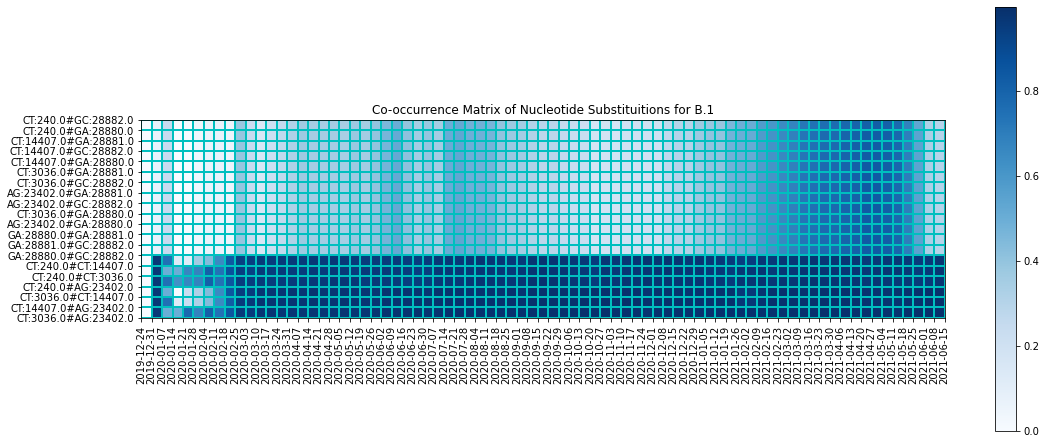

In [209]:
#plot weekly co-occurrence of a particular lineage
import numpy as np
z=np.zeros((20, len(langs)))
print(len(langs))
print(len(ss))
index=0
for i in range(len(ss)):
    s1=ss[i]
    #print(s1)
    for j in range(len(langs)):
        z[index][j]=s1[j]
    index=index+1

x=[]
count=0
for i in range(len(langs)):
    x.append(count)
    count = count+1
y=[]
print(len(z[0]))
for i in range(20):
    y.append(i)
fig = plt.figure(figsize=(18,52)) 
ax1 = fig.add_subplot(111)
c=ax1.pcolormesh(x, y, z,edgecolors='c',cmap="Blues")
ax1.set_xticks(x)
ax1.set_xticklabels(langs,rotation=90)
ax1.set_yticks(y)
ax1.set_yticklabels(key_cooc)
ax1.set_aspect('equal')
ax1.set_title("Co-occurrence Matrix of Nucleotide Substituitions for B.1")
fig.colorbar(c, ax=ax1,shrink=0.15)           

78
7
0.01639344262295082


<ipython-input-211-af9955b6e55e>:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c=ax1.pcolormesh(x, y, z,edgecolors='c',cmap="Blues")


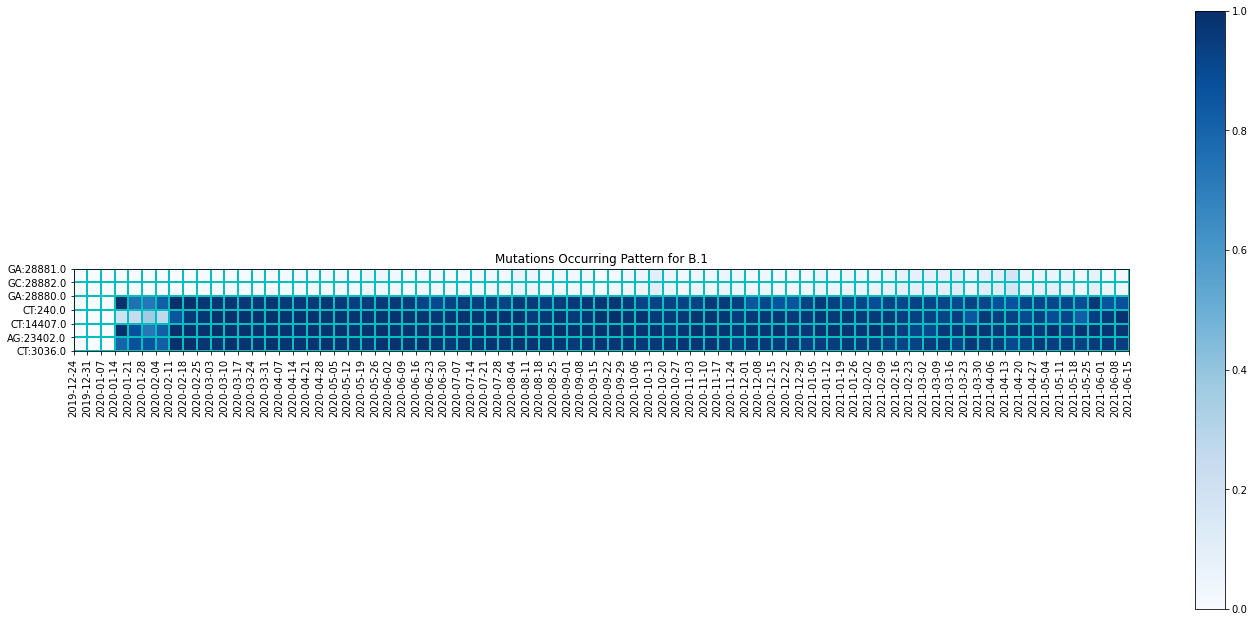

In [211]:
import numpy as np

langs=[]
xj=[]
count=0
for i in range(len(weeks)-1):
        langs.append(datetime.datetime.strftime(weeks[i][0], "%Y-%m-%d"))

z=np.zeros((7, len(langs)))
print(len(langs))
print(len(s.keys()))
count=0
key_cooc=[]
for i in s.keys():
    s1=s[i]
    key_cooc.append(i)
    for j in range(len(langs)):
        z[count][j]=s1[j]
    count=count+1
print(z[5][75])
x=[]
count=0
for i in range(len(langs)):
    x.append(count)
    count = count+1
y=[]

for i in range(7):
    y.append(i)


fig = plt.figure(figsize=(52,11)) 
ax1 = fig.add_subplot(121)
c=ax1.pcolormesh(x, y, z,edgecolors='c',cmap="Blues")
ax1.set_xticks(x)
ax1.set_xticklabels(langs,rotation=90)
ax1.set_yticks(y)
ax1.set_yticklabels(key_cooc)
ax1.set_aspect('equal')
ax1.set_title("Mutations Occurring Pattern for B.1")
fig.colorbar(c, ax=ax1)      

In [55]:
print(s)

{'CT:3036.0': [0, 0, 0, 0, 0, 0, 0, 35, 0, 0, 0, 23, 0, 52, 18, 4, 4, 6, 12, 49, 11, 44, 47, 45, 22, 0, 0, 0, 22, 0, 0, 0, 0, 28, 155, 194, 494, 490, 626, 660, 471, 788, 1074, 1409, 2436, 2103, 2001, 4629, 2967, 3664, 5647, 7066, 9919, 12868, 13050, 11976, 12640, 14378, 17510, 22575, 23459, 29747, 33717, 48517, 44155, 39222, 26156, 32084, 32026, 25496, 23366, 19549, 14349, 8356, 7577, 8160, 1630, 440], 'AG:23402.0': [0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 10, 0, 22, 7, 3, 3, 3, 7, 26, 7, 26, 20, 31, 14, 0, 0, 0, 9, 0, 0, 0, 0, 12, 57, 79, 257, 231, 285, 305, 192, 334, 457, 578, 1022, 880, 846, 2037, 1266, 1570, 2418, 2963, 4167, 5416, 5592, 5058, 5306, 6148, 7730, 9856, 10278, 12951, 14599, 21041, 19027, 16852, 11199, 13671, 13857, 10807, 9980, 8317, 6276, 3667, 3162, 3446, 719, 176], 'TC:16175.0': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 12, 28, 0, 0, 0, 15, 0, 0, 38, 14, 100, 139, 196, 126, 24, 81, 146,